In [1]:
#Data ingestion & memory-savvy joins
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
dtypes_orders = {
    'order_id': 'int32',
    'user_id': 'int32',
    'eval_set': 'category',
    'order_number': 'int16',
    'order_dow': 'int8',
    'order_hour_of_day': 'int8',
    'days_since_prior_order': 'float32'
}
dtypes_products={
    'order_id': 'int32',
    'product_id': 'int32',
    'add_to_cart_order': 'int16',
    'reordered': 'int8'
}

orders = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/orders.csv',dtype=dtypes_orders)
products_train=pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__train.csv',dtype=dtypes_products)
products_prior=pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv',dtype=dtypes_products)
products = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/products.csv')
departments = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/departments.csv')
aisles=pd.read_csv('/kaggle/input/instacart-market-basket-analysis/aisles.csv')

/kaggle/input/instacart-market-basket-analysis/products.csv
/kaggle/input/instacart-market-basket-analysis/order_products__train.csv
/kaggle/input/instacart-market-basket-analysis/orders.csv
/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv
/kaggle/input/instacart-market-basket-analysis/aisles.csv
/kaggle/input/instacart-market-basket-analysis/departments.csv


# Exploratory Data Analysis

In [2]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
orders.info()
print(orders.shape)
missing_data_orders=orders.isnull().sum()
print(missing_data_orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                category
 3   order_number            int16   
 4   order_dow               int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float32 
dtypes: category(1), float32(1), int16(1), int32(2), int8(2)
memory usage: 55.5 MB
(3421083, 7)
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


In [4]:
orders["eval_set"].value_counts()

eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

In [5]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,3421083.0,1.710542e+06,987581.739825,1.0,855271.5,1710542.0,2565812.5,3421083.0
user_id,3421083.0,1.029782e+05,59533.717793,1.0,51394.0,102689.0,154385.0,206209.0
order_number,3421083.0,1.715486e+01,17.733164,1.0,5.0,11.0,23.0,100.0
order_dow,3421083.0,2.776219e+00,2.046829,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,3421083.0,1.345202e+01,4.226088,0.0,10.0,13.0,16.0,23.0
days_since_prior_order,3214874.0,1.111483e+01,9.161989,0.0,4.0,7.0,15.0,30.0


In [6]:
products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
products_train.info()
print(products_train.shape)
missing_data_products_train=products_train.isnull().sum()
print(missing_data_products_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int32
 1   product_id         1384617 non-null  int32
 2   add_to_cart_order  1384617 non-null  int16
 3   reordered          1384617 non-null  int8 
dtypes: int16(1), int32(2), int8(1)
memory usage: 14.5 MB
(1384617, 4)
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [8]:
products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
products_prior.info()
print(products_prior.shape)
missing_data_products_prior=products_prior.isnull().sum()
print(missing_data_products_prior)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int32
 1   product_id         int32
 2   add_to_cart_order  int16
 3   reordered          int8 
dtypes: int16(1), int32(2), int8(1)
memory usage: 340.3 MB
(32434489, 4)
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [10]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
products.info()
print(products.shape)
missing_data_products=products.isnull().sum()
print(missing_data_products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
(49688, 4)
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


In [12]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:
departments.info()
print(departments.shape)
missing_data_departments=departments.isnull().sum()
print(missing_data_departments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
(21, 2)
department_id    0
department       0
dtype: int64


In [14]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [15]:
aisles.info()
print(aisles.shape)
missing_data_aisles=aisles.isnull().sum()
print(missing_data_aisles)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
(134, 2)
aisle_id    0
aisle       0
dtype: int64


                        Missing Values  Percentage
days_since_prior_order          206209    6.027594


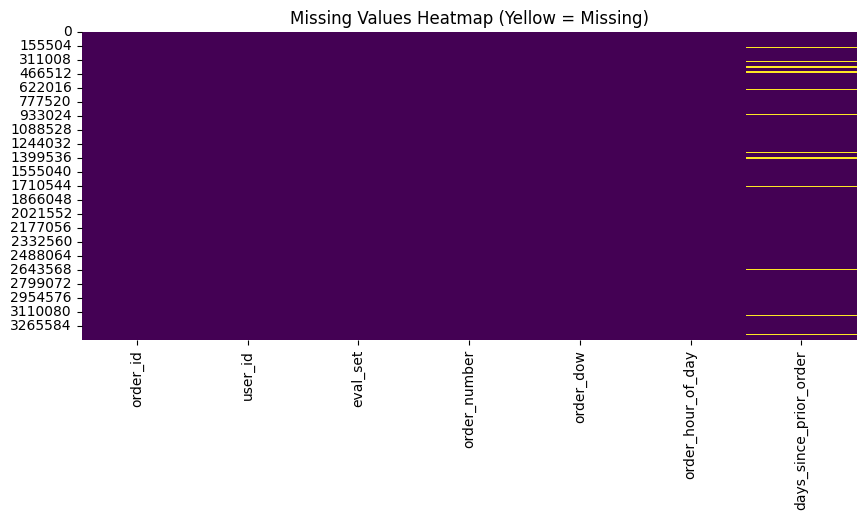

In [16]:
# 1. Calculate missing percentages
missing_data = pd.DataFrame({
    'Missing Values': orders.isnull().sum(),
    'Percentage': (orders.isnull().sum() / len(orders)) * 100
})
print(missing_data[missing_data['Missing Values'] > 0])

# 2. Visualize missing values
plt.figure(figsize=(10,4))
sns.heatmap(orders.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Yellow = Missing)')
plt.show()

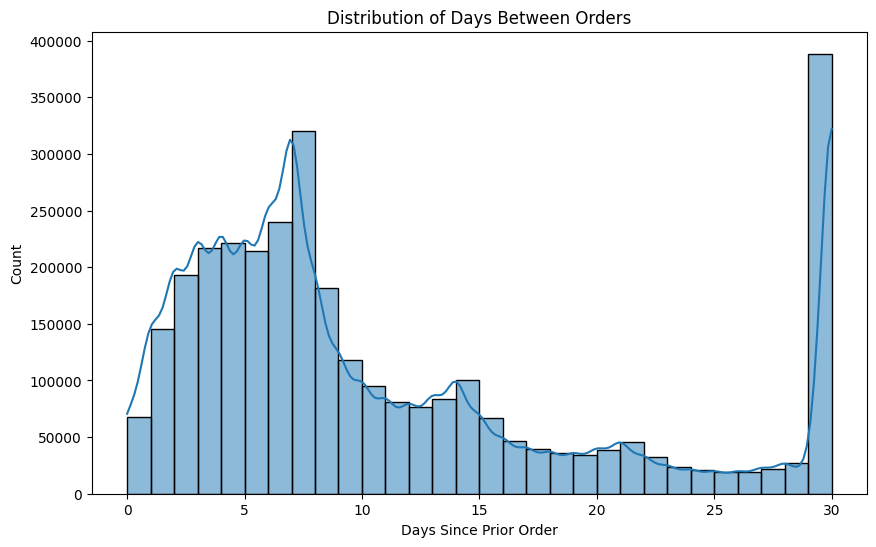

In [17]:
# Distribution Plots
plt.figure(figsize=(10,6))
sns.histplot(orders['days_since_prior_order'].dropna(), bins=30, kde=True)
plt.title('Distribution of Days Between Orders')
plt.xlabel('Days Since Prior Order')
plt.show()

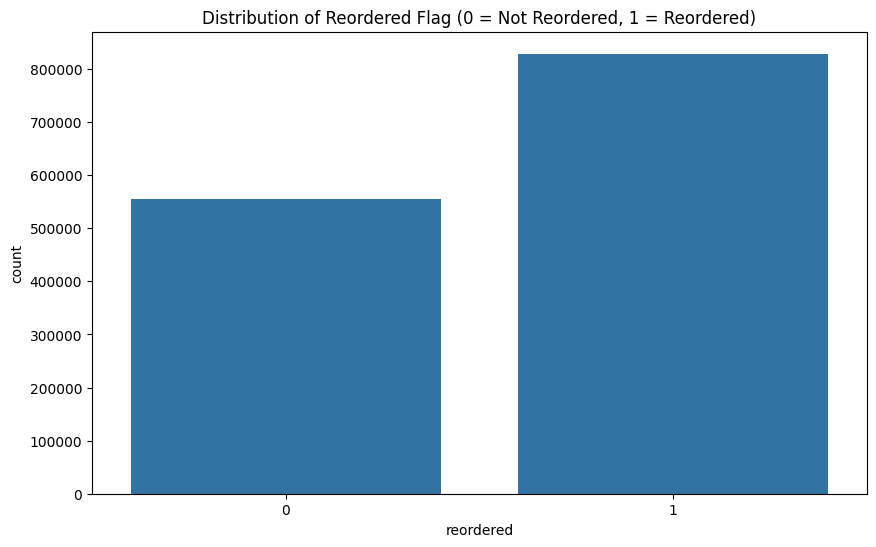

Class imbalance: Not Reordered = 40.14%, Reordered = 59.86%


In [18]:
# Distribution of Reordered Flag
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='reordered', data=products_train)
plt.title('Distribution of Reordered Flag (0 = Not Reordered, 1 = Reordered)')
plt.show()
imbalance_ratio = products_train['reordered'].value_counts(normalize=True)
print(f"Class imbalance: Not Reordered = {imbalance_ratio[0]:.2%}, Reordered = {imbalance_ratio[1]:.2%}")

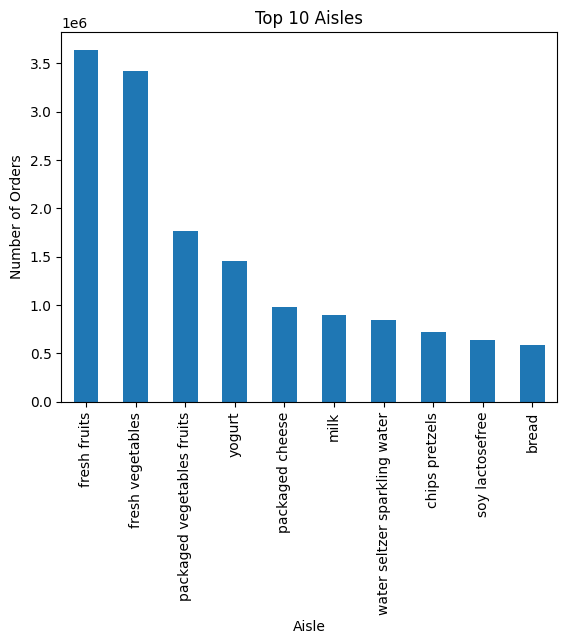

In [19]:
#Top 10 Aisles
orders_products_merged = products_prior.merge(
    products[['product_id', 'aisle_id']],
    on='product_id',
    how='left'
)

orders_with_aisle = orders_products_merged.merge(
    aisles,
    on='aisle_id',
    how='left'
)

aisle_counts = orders_with_aisle['aisle'].value_counts()

top_10_aisles = aisle_counts.head(10)

top_10_aisles.plot(kind='bar')
plt.title('Top 10 Aisles')
plt.xlabel('Aisle')
plt.ylabel('Number of Orders')
plt.show()

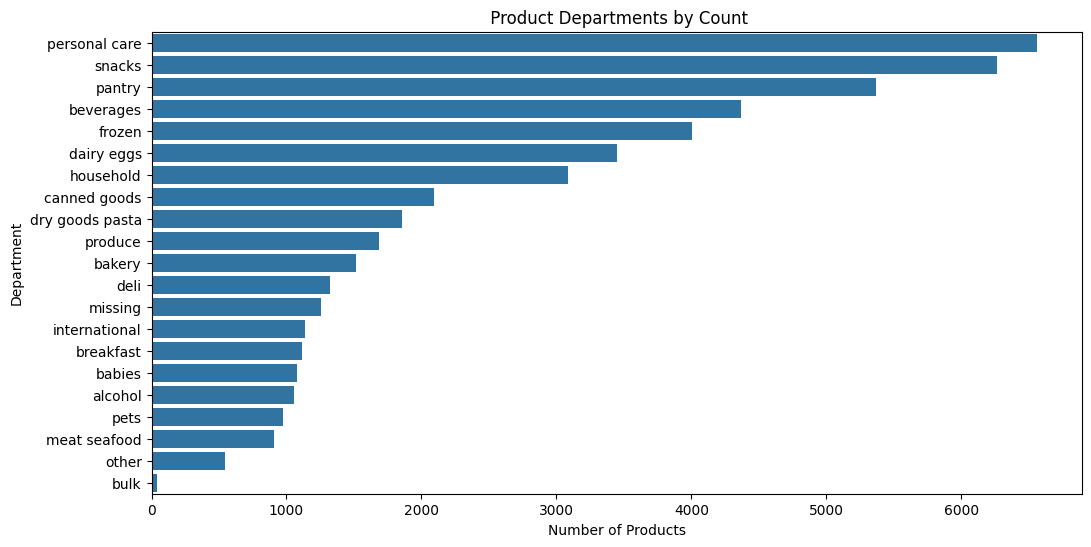

In [20]:
#Top Departments
products_dept = products.merge(departments, on='department_id')
dept_counts = products_dept['department'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(
    x=dept_counts.values,
    y=dept_counts.index
)
plt.title(' Product Departments by Count')
plt.xlabel('Number of Products')
plt.ylabel('Department')
plt.show()

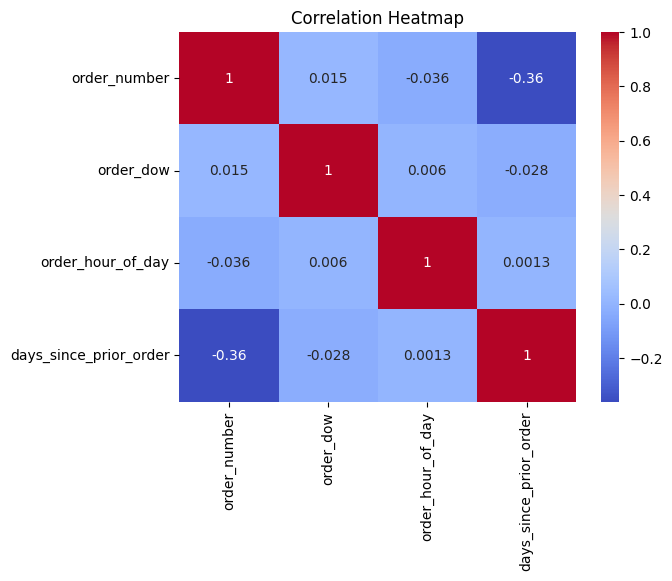

In [21]:
#Heatmap
numeric_df=orders[['order_number','order_dow'
,'order_hour_of_day'
,'days_since_prior_order']]
corr=numeric_df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

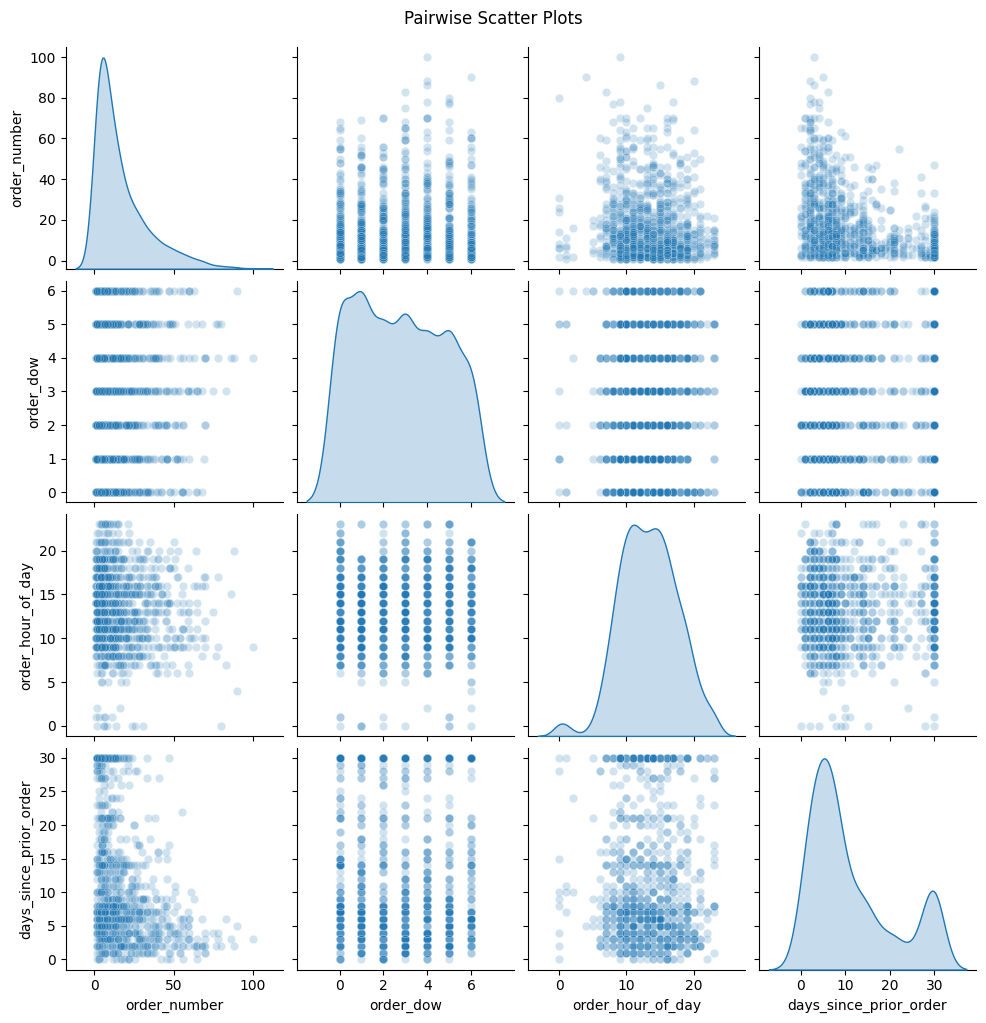

In [22]:
# pairwise scatter plots
sns.pairplot(numeric_df.sample(1000), diag_kind='kde', plot_kws={'alpha': 0.2})
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

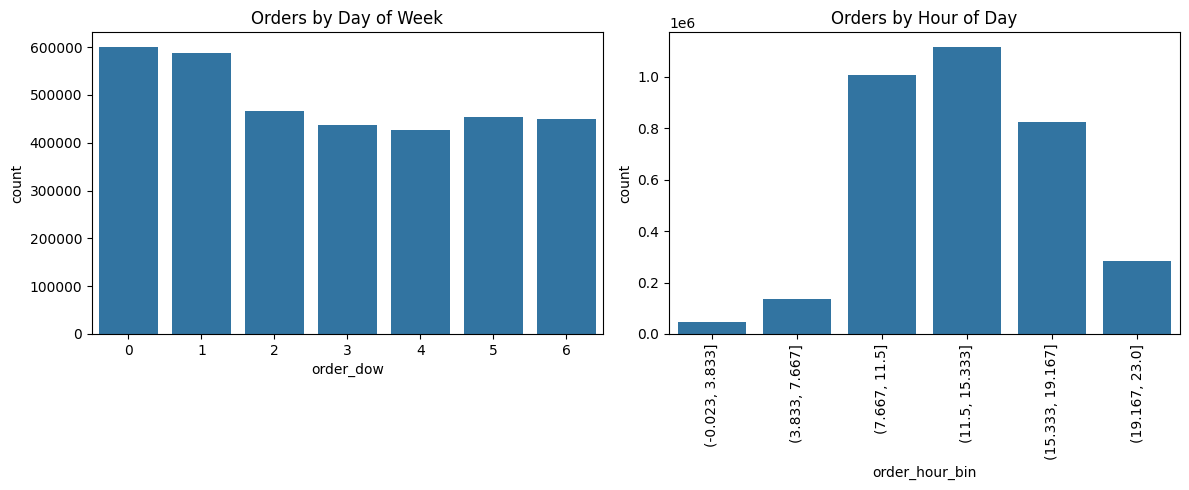

In [23]:
# day-of-week
orders['order_hour_bin'] = pd.cut(orders['order_hour_of_day'], bins=6)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='order_dow', data=orders)
plt.title('Orders by Day of Week')

# time-of-day
plt.subplot(1,2,2)
sns.countplot(x='order_hour_bin', data=orders)
plt.title('Orders by Hour of Day')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

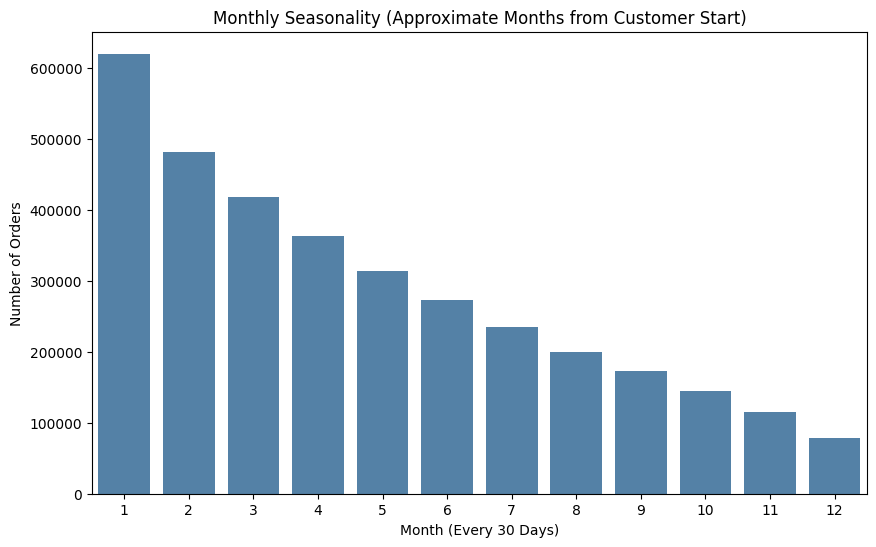

In [24]:
#monthly seasonality plots
orders['cum_days'] = orders.groupby('user_id')['days_since_prior_order'].cumsum().fillna(0)

orders['month_proxy'] = (orders['cum_days'] // 30).astype(int) + 1

plt.figure(figsize=(10, 6))
sns.countplot(data=orders[orders['month_proxy'] <= 12], x='month_proxy', color='steelblue')
plt.title('Monthly Seasonality (Approximate Months from Customer Start)')
plt.xlabel('Month (Every 30 Days)')
plt.ylabel('Number of Orders')
plt.show()

# Cleaning & Imputation 

In [25]:
#Handle Missing Values
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0) #better option
#or 
#orders_with_median = orders['days_since_prior_order'].median()
#orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(orders_with_median)

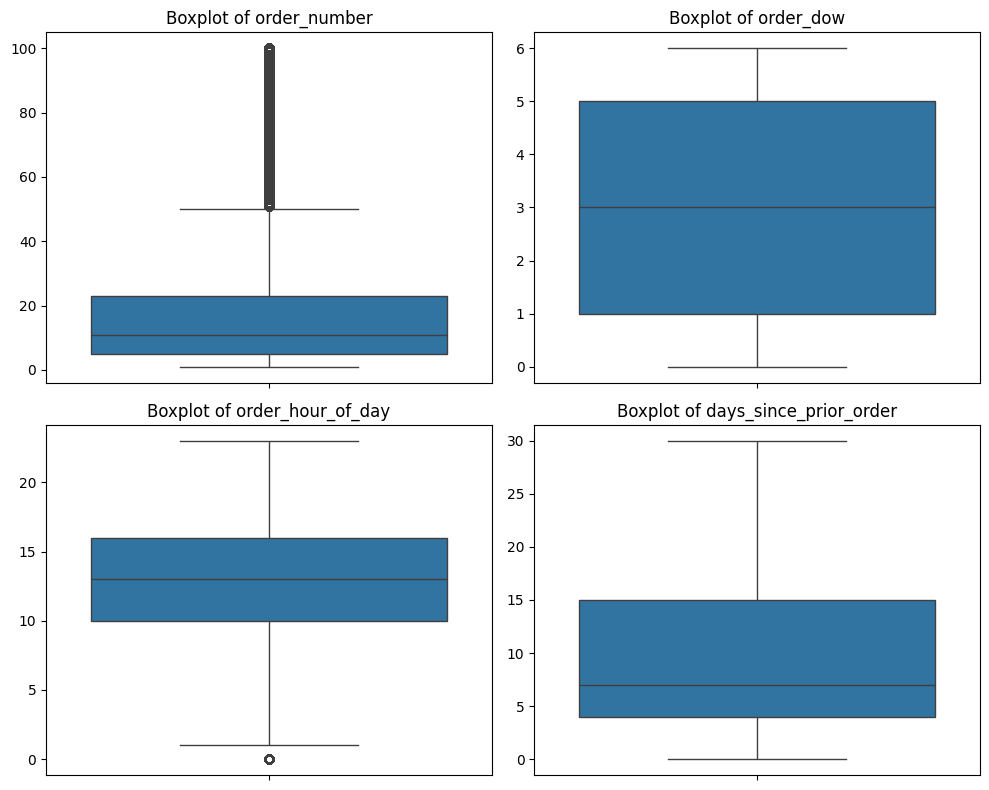

In [26]:
#Outlier Detection By Using Boxplot
#before treatment
numeric_features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(y=orders[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [27]:
#Outlier treatment
top_value = orders['order_number'].quantile(0.95)
orders['order_number'] = orders['order_number'].clip(upper=top_value)

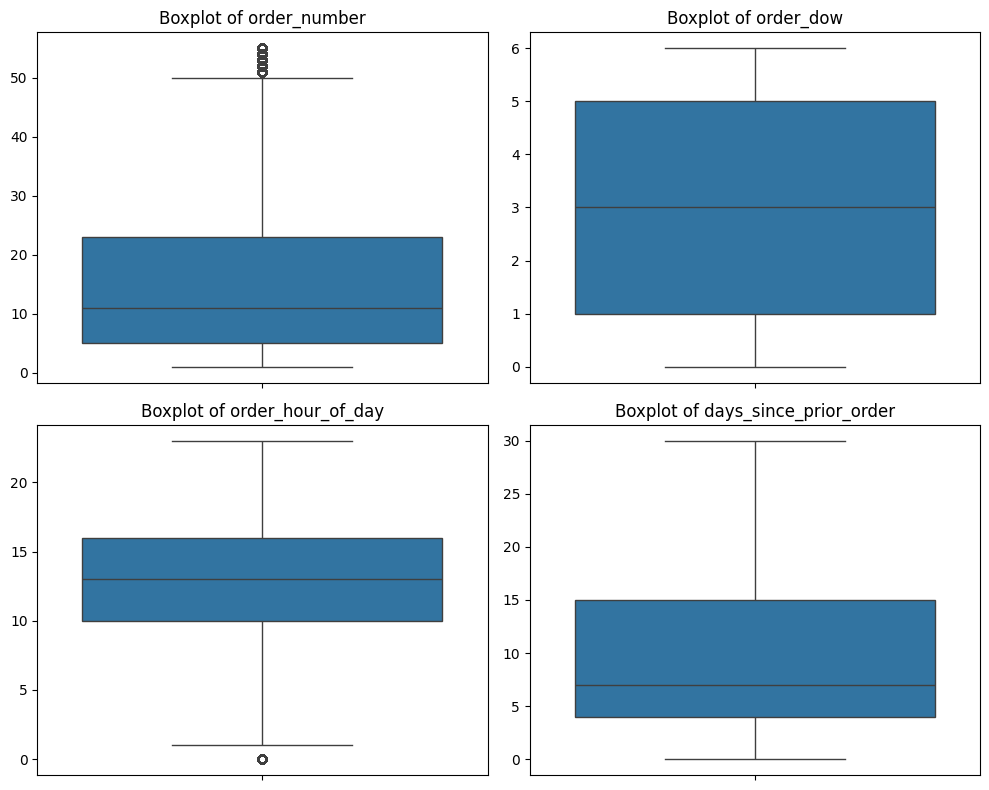

In [28]:
#After treatment
numeric_features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(y=orders[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [29]:
# Split orders
orders_prior_only = orders.loc[orders['eval_set'] == 'prior']
orders_train_only = orders.loc[orders['eval_set'] == 'train']

# Prior orders
products_prior_full = products_prior.merge(
    orders_prior_only, 
    on='order_id', 
    how='inner'
)
products_prior_full = products_prior_full.merge(
    products, 
    on='product_id', 
    how='left', 
    suffixes=('', '_prod')
)
products_prior_full = products_prior_full.merge(aisles, on='aisle_id', how='left')
products_prior_full = products_prior_full.merge(departments, on='department_id', how='left')

# Train orders
products_train = products_train.rename(columns={'reordered': 'target'})
orders_train = products_train.merge(orders_train_only, on='order_id', how='inner')
orders_train = orders_train.merge(
    products,
    on='product_id', 
    how='left', 
    suffixes=('', '_prod')
)
orders_train = orders_train.merge(aisles, on='aisle_id', how='left')
orders_train = orders_train.merge(departments, on='department_id', how='left')

# Feature Engineering

In [30]:
# User features
user_features = (
    orders_prior_only.groupby('user_id')['order_number']
    .max()
    .to_frame('u_total_orders')
    .reset_index()
)
user_days = (
    orders_prior_only.groupby('user_id')['days_since_prior_order']
    .mean()
    .to_frame('u_avg_days_between')
    .reset_index()
)

user_df = user_features.merge(user_days, on='user_id', how='left',suffixes=('', '_days'))

# Train data
orders_train = orders_train.merge(user_df, on='user_id', how='left',suffixes=('', '_user'))

In [31]:
# Product features
prod_count = (
    products_prior.groupby('product_id')['order_id']
    .count()
    .to_frame('p_total_purchases')
    .reset_index()
)
prod_reorder_rate = (
    products_prior.groupby('product_id')['reordered']
    .mean()
    .to_frame('p_reorder_rate')
    .reset_index()
)
prod_pos = (
    products_prior.groupby('product_id')['add_to_cart_order']
    .mean()
    .to_frame('p_avg_pos_cart')
    .reset_index()
)

product_features = prod_count.merge(prod_reorder_rate, on='product_id', how='left')
product_features = product_features.merge(prod_pos, on='product_id', how='left')

# Merge into train data
orders_train = orders_train.merge(product_features, on='product_id', how='left')

In [32]:
# User-Product Features
user_product_counts = (
    products_prior_full
    .groupby(['user_id', 'product_id'])['order_id']
    .count()
    .reset_index()
)
user_product_counts.columns = ['user_id', 'product_id', 'user_product_purchase_count']

orders_train = orders_train.merge(
    user_product_counts, 
    on=['user_id', 'product_id'], 
    how='left'
)

print(orders_train[['user_id', 'product_id', 'user_product_purchase_count']].head())

   user_id  product_id  user_product_purchase_count
0   112108       49302                          2.0
1   112108       11109                          2.0
2   112108       10246                          NaN
3   112108       49683                          NaN
4   112108       43633                          2.0


In [33]:
# Aggregations over windows
products_prior_full['order_rank'] = products_prior_full.groupby(['user_id', 'product_id']).cumcount(ascending=False)
products_prior_full['is_in_last_3'] = (products_prior_full['order_rank'] < 3)
products_prior_full.drop(columns=['order_rank'], inplace=True)

user_product_last3 = (
    products_prior_full[['user_id', 'product_id', 'is_in_last_3']]
    .groupby(['user_id','product_id'])['is_in_last_3'] 
    .max()
    .reset_index()
)

#train_data
orders_train = orders_train.merge(user_product_last3, on=['user_id','product_id'], how='left')

print(orders_train[['user_id','product_id','is_in_last_3']].head())

   user_id  product_id is_in_last_3
0   112108       49302         True
1   112108       11109         True
2   112108       10246          NaN
3   112108       49683          NaN
4   112108       43633         True


In [34]:
# Temporal feature
products_prior_full['is_weekend'] = products_prior_full['order_dow'].isin([0, 6])

last_3 = products_prior_full.groupby('user_id').tail(3)

recent_reorder = (
    last_3.groupby('user_id')['reordered']
    .mean()
    .reset_index()
    .rename(columns={'reordered': 'u_recent_reorder_rate'})
)

orders_train = orders_train.merge(recent_reorder, on='user_id', how='left')

print(orders_train[['user_id','u_recent_reorder_rate']].head())

   user_id  u_recent_reorder_rate
0   112108                    0.0
1   112108                    0.0
2   112108                    0.0
3   112108                    0.0
4   112108                    0.0


In [35]:
orders_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   order_id                     1384617 non-null  int32   
 1   product_id                   1384617 non-null  int32   
 2   add_to_cart_order            1384617 non-null  int16   
 3   target                       1384617 non-null  int8    
 4   user_id                      1384617 non-null  int32   
 5   eval_set                     1384617 non-null  category
 6   order_number                 1384617 non-null  int16   
 7   order_dow                    1384617 non-null  int8    
 8   order_hour_of_day            1384617 non-null  int8    
 9   days_since_prior_order       1384617 non-null  float32 
 10  order_hour_bin               1384617 non-null  category
 11  cum_days                     1384617 non-null  float32 
 12  month_proxy                 

In [36]:
#Non-linear feature
orders_train['log_total_orders'] = np.log1p(orders_train['u_total_orders'])

In [37]:
for var in ['orders', 'products_prior', 'products', 'aisles', 'departments']:
    if var in globals():
        del globals()[var]

import gc
gc.collect()

67771

# Encoding Categorical Variables

In [38]:
# One-Hot Encoding (OHE)
# Define bins and labels
bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']

orders_train['hour_bin'] = pd.cut(orders_train['order_hour_of_day'], bins=bins, labels=labels, right=False)

orders_train = pd.get_dummies(orders_train, columns=['hour_bin', 'order_dow'], drop_first=True)

In [39]:
orders_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   order_id                     1384617 non-null  int32   
 1   product_id                   1384617 non-null  int32   
 2   add_to_cart_order            1384617 non-null  int16   
 3   target                       1384617 non-null  int8    
 4   user_id                      1384617 non-null  int32   
 5   eval_set                     1384617 non-null  category
 6   order_number                 1384617 non-null  int16   
 7   order_hour_of_day            1384617 non-null  int8    
 8   days_since_prior_order       1384617 non-null  float32 
 9   order_hour_bin               1384617 non-null  category
 10  cum_days                     1384617 non-null  float32 
 11  month_proxy                  1384617 non-null  int64   
 12  product_name                

In [40]:
# Target Encoding
# K-fold encoding simplified
from sklearn.model_selection import KFold

global_mean = products_prior_full['reordered'].mean()
orders_train['user_target_enc'] = global_mean  # Initialize with global mean
orders_train['product_target_enc'] = global_mean

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(orders_train)):
    
    # Get training data for this fold
    train_data = orders_train.iloc[train_idx]
    
    # Merge with prior data
    user_means = pd.concat([
        products_prior_full[['user_id', 'reordered']],
        train_data[['user_id', 'target']]
    ]).groupby('user_id')['reordered'].mean()
    
    product_means = pd.concat([
        products_prior_full[['product_id', 'reordered']],
        train_data[['product_id', 'target']]
    ]).groupby('product_id')['reordered'].mean()
    
    # Apply to validation fold
    orders_train.loc[val_idx, 'user_target_enc'] = orders_train.loc[val_idx, 'user_id'].map(user_means)
    orders_train.loc[val_idx, 'product_target_enc'] = orders_train.loc[val_idx, 'product_id'].map(product_means)

print(orders_train[['user_id', 'user_target_enc', 'product_id', 'product_target_enc']].head())

   user_id  user_target_enc  product_id  product_target_enc
0   112108         0.428571       49302            0.619632
1   112108         0.428571       11109            0.713775
2   112108         0.428571       10246            0.524553
3   112108         0.428571       49683            0.691702
4   112108         0.428571       43633            0.477795


In [41]:
# Frequency Encoding
aisle_freq = products_prior_full['aisle_id'].value_counts()
dept_freq = products_prior_full['department_id'].value_counts()

orders_train['aisle_freq_enc'] = orders_train['aisle_id'].map(aisle_freq)
orders_train['dept_freq_enc'] = orders_train['department_id'].map(dept_freq)

print(orders_train[['aisle_id', 'aisle_freq_enc', 'department_id', 'dept_freq_enc']].head())

   aisle_id  aisle_freq_enc  department_id  dept_freq_enc
0       120         1452343             16        5414016
1       108          308007             16        5414016
2        83         3418021              4        9479291
3        83         3418021              4        9479291
4        95           67046             15        1068058


In [42]:
orders_train.isnull().sum()

order_id                            0
product_id                          0
add_to_cart_order                   0
target                              0
user_id                             0
eval_set                            0
order_number                        0
order_hour_of_day                   0
days_since_prior_order              0
order_hour_bin                      0
cum_days                            0
month_proxy                         0
product_name                        0
aisle_id                            0
department_id                       0
aisle                               0
department                          0
u_total_orders                      0
u_avg_days_between                  0
p_total_purchases                   9
p_reorder_rate                      9
p_avg_pos_cart                      9
user_product_purchase_count    555793
is_in_last_3                   555793
u_recent_reorder_rate               0
log_total_orders                    0
hour_bin_mor

In [43]:
# Handle Missing Values
# count columns 
orders_train['user_product_purchase_count'] = orders_train['user_product_purchase_count'].fillna(0)
orders_train['p_total_purchases'] = orders_train['p_total_purchases'].fillna(0)

# flag columns
orders_train['is_in_last_3'] = orders_train['is_in_last_3'].fillna(0)

# freq column
orders_train['aisle_freq_enc'] = orders_train['aisle_freq_enc'].fillna(0)


# rate/average/target columns 
rate_columns = [
    'p_reorder_rate',
    'p_avg_pos_cart', 
    'u_avg_days_between',
    'u_recent_reorder_rate',
    'product_target_enc'
]

for col in rate_columns:
    orders_train[col] = orders_train[col].fillna(orders_train[col].mean())

In [44]:
orders_train.isnull().sum()

order_id                       0
product_id                     0
add_to_cart_order              0
target                         0
user_id                        0
eval_set                       0
order_number                   0
order_hour_of_day              0
days_since_prior_order         0
order_hour_bin                 0
cum_days                       0
month_proxy                    0
product_name                   0
aisle_id                       0
department_id                  0
aisle                          0
department                     0
u_total_orders                 0
u_avg_days_between             0
p_total_purchases              0
p_reorder_rate                 0
p_avg_pos_cart                 0
user_product_purchase_count    0
is_in_last_3                   0
u_recent_reorder_rate          0
log_total_orders               0
hour_bin_morning               0
hour_bin_afternoon             0
hour_bin_evening               0
order_dow_1                    0
order_dow_

# Dimensionality & collinearity

In [45]:
cols_to_drop = [
    'order_id', 'user_id', 'product_id', 
    'aisle_id', 'department_id', 
    'product_name', 'aisle', 'department', 
    'eval_set','order_hour_of_day','days_since_prior_order','order_hour_bin'
]

orders_train = orders_train.drop(columns=[col for col in cols_to_drop if col in orders_train.columns])

orders_train = orders_train.select_dtypes(include=['number'])

print(orders_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 17 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   add_to_cart_order            1384617 non-null  int16  
 1   target                       1384617 non-null  int8   
 2   order_number                 1384617 non-null  int16  
 3   cum_days                     1384617 non-null  float32
 4   month_proxy                  1384617 non-null  int64  
 5   u_total_orders               1384617 non-null  int16  
 6   u_avg_days_between           1384617 non-null  float32
 7   p_total_purchases            1384617 non-null  float64
 8   p_reorder_rate               1384617 non-null  float64
 9   p_avg_pos_cart               1384617 non-null  float64
 10  user_product_purchase_count  1384617 non-null  float64
 11  u_recent_reorder_rate        1384617 non-null  float64
 12  log_total_orders             1384617 non-n

In [46]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

sample_data = orders_train.sample(n=10000, random_state=42)
numeric_data = sample_data.select_dtypes(include='number')  

for i in range(10):
    vif_list = []
    for j in range(len(numeric_data.columns)):
        vif_list.append({'column': numeric_data.columns[j], 
                        'VIF': variance_inflation_factor(numeric_data.values, j)})
    
    vif_table = pd.DataFrame(vif_list)
    
    if vif_table['VIF'].max() <= 10:
        break
    
    worst = vif_table.loc[vif_table['VIF'].idxmax(), 'column']
    numeric_data = numeric_data.drop(columns=[worst])

orders_train = orders_train[numeric_data.columns.tolist() + 
                            orders_train.select_dtypes(exclude='number').columns.tolist()]

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [47]:
print(orders_train.shape)

(1384617, 8)


In [48]:
from sklearn.model_selection import train_test_split

X = orders_train.drop(columns=['target'])
y = orders_train['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)

(1107693, 7) (276924, 7)


# Feature scaling

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler_std = StandardScaler()
X_train_std = X_train.copy()
X_test_std = X_test.copy()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Normalization
scaler_minmax = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_train_norm = scaler_minmax.fit_transform(X_train)
X_test_norm = scaler_minmax.transform(X_test)

# Imbalanced data handling

In [50]:
# Determine class imbalance
reordered_count = orders_train['target'].value_counts()[1]
not_reordered_count = orders_train['target'].value_counts()[0]

total = reordered_count + not_reordered_count

print(f"Percentage of reorders: {(reordered_count / total) * 100:.1f}%")
print(f"Percentage of not reordered: {(not_reordered_count / total) * 100:.1f}%")

Percentage of reorders: 59.9%
Percentage of not reordered: 40.1%


**(a) class weights**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as XGB
from sklearn.metrics import f1_score

# Without class weight
# Logistic Regression
logreg_without = LogisticRegression(max_iter=1000, random_state=42)
logreg_without.fit(X_train_std, y_train)
pred_logreg_without = logreg_without.predict(X_test_std)
f1_logreg_without = f1_score(y_test, pred_logreg_without)
print(f"Logistic Regression: {f1_logreg_without*100:.2f}%")

# Random Forest
rf_without = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf_without.fit(X_train_norm, y_train)
pred_rf_without = rf_without.predict(X_test_norm)
f1_rf_without = f1_score(y_test, pred_rf_without)
print(f"Random Forest: {f1_rf_without*100:.2f}%")

# XGBoost
xgb_without = XGB.XGBClassifier(n_jobs=-1, random_state=42, eval_metric='logloss')
xgb_without.fit(X_train_norm, y_train)
pred_xgb_without = xgb_without.predict(X_test_norm)
f1_xgb_without = f1_score(y_test, pred_xgb_without)
print(f"XGBoost: {f1_xgb_without*100:.2f}%")

Logistic Regression: 100.00%
Random Forest: 100.00%
XGBoost: 100.00%


In [52]:
# With class weight
# Logistic Regression 
logreg_with = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg_with.fit(X_train_std, y_train)
pred_logreg_with = logreg_with.predict(X_test_std)
f1_logreg_with = f1_score(y_test, pred_logreg_with)
print(f"Logistic Regression: {f1_logreg_with*100:.2f}%")

# Random Forest 
rf_with = RandomForestClassifier(
    class_weight='balanced', 
    n_estimators=50, 
    max_depth=10, 
    n_jobs=-1, 
    random_state=42
)
rf_with.fit(X_train_norm, y_train)
pred_rf_with = rf_with.predict(X_test_norm)
f1_rf_with = f1_score(y_test, pred_rf_with)
print(f"Random Forest: {f1_rf_with*100:.2f}%")  

# XGBoost 
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_with = XGB.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1, 
    random_state=42, 
    eval_metric='logloss'
)
xgb_with.fit(X_train_norm, y_train)
pred_xgb_with = xgb_with.predict(X_test_norm)
f1_xgb_with = f1_score(y_test, pred_xgb_with)
print(f"XGBoost: {f1_xgb_with*100:.2f}%") 

Logistic Regression: 100.00%
Random Forest: 100.00%
XGBoost: 100.00%


**(b) sampling strategies**

In [53]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Resampling
X_smote, y_smote = SMOTE(random_state=42).fit_resample(X_train_std, y_train)
X_under, y_under = RandomUnderSampler(random_state=42).fit_resample(X_train_std, y_train)

# Training Models:
# Logistic Regression
logreg_smote = LogisticRegression(max_iter=1000).fit(X_smote, y_smote)
logreg_under = LogisticRegression(max_iter=1000).fit(X_under, y_under) 

# Random Forest
rf_smote = RandomForestClassifier(random_state=42).fit(X_smote, y_smote)
rf_under = RandomForestClassifier(random_state=42).fit(X_under, y_under)

# XGBoost 
xgb_smote = XGB.XGBClassifier(random_state=42).fit(X_smote, y_smote)
xgb_under = XGB.XGBClassifier(random_state=42).fit(X_under, y_under)

print(f"SMOTE (Logistic Regression): {f1_score(y_test, logreg_smote.predict(X_test_std))*100:.2f}%")
print(f"Undersample (Logistic Regression): {f1_score(y_test, logreg_under.predict(X_test_std))*100:.2f}%")

print(f"SMOTE (Random Forest): {f1_score(y_test, rf_smote.predict(X_test_std))*100:.2f}%")
print(f"Undersample (Random Forest): {f1_score(y_test, rf_under.predict(X_test_std))*100:.2f}%")

print(f"SMOTE (XGBoost): {f1_score(y_test, xgb_smote.predict(X_test_std))*100:.2f}%")
print(f"Undersample (XGBoost): {f1_score(y_test, xgb_under.predict(X_test_std))*100:.2f}%")

SMOTE (Logistic Regression): 100.00%
Undersample (Logistic Regression): 100.00%
SMOTE (Random Forest): 100.00%
Undersample (Random Forest): 100.00%
SMOTE (XGBoost): 100.00%
Undersample (XGBoost): 100.00%


# Task A

In [54]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_l2=LogisticRegression(
    penalty='l2',
    C=1.0,
    class_weight='balanced'
)
lr_l2.fit(X_train_norm, y_train)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=15,
)

knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=15)

In [55]:
models = {
    "LR_L2": (lr_l2,X_test_norm ),
  #"LR_L1": (lr_l1,X_test_norm),
    "KNN": (knn,X_test_std )
}

In [56]:
#Accuracy, Precision, Recall, F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, (model, X_) in models.items():
    y_pred = model.predict(X_)
    
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))


LR_L2
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0

KNN
Accuracy : 0.9781095174127198
Precision: 0.991130902224655
Recall   : 0.9721292190751968
F1-score : 0.9815381054478121


In [57]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

for name, (model, X_) in models.items():
    y_pred = model.predict(X_)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n{name} Confusion Matrix")
    print(cm)


LR_L2 Confusion Matrix
[[111159      0]
 [     0 165765]]

KNN Confusion Matrix
[[109717   1442]
 [  4620 161145]]


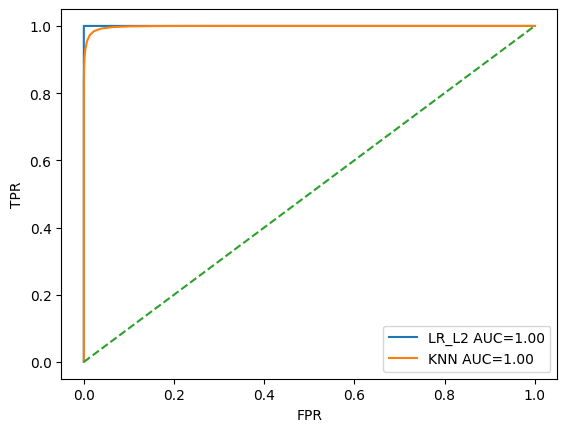

In [58]:
#ROC Curve + AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure()

for name, (model, X_) in models.items():
    y_prob = model.predict_proba(X_)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} AUC={auc:.2f}")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

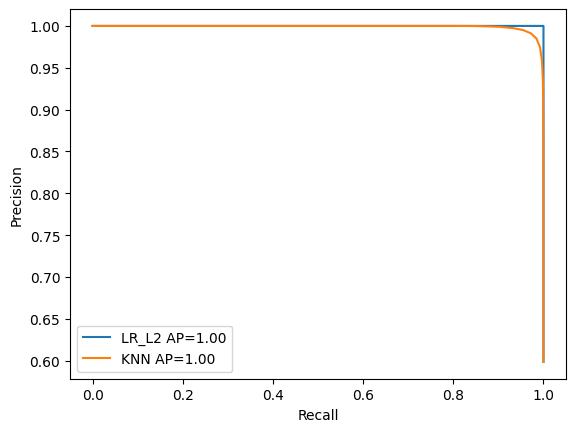

In [59]:
#Precision–Recall Curve + AP
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure()

for name, (model, X_) in models.items():
    y_prob = model.predict_proba(X_)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} AP={ap:.2f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

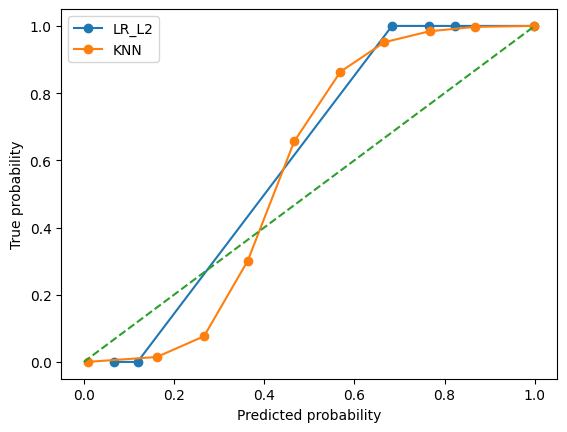

In [60]:
#Calibration Curve
from sklearn.calibration import calibration_curve

plt.figure()

for name, (model, X_) in models.items():
    y_prob = model.predict_proba(X_)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("Predicted probability")
plt.ylabel("True probability")
plt.legend()
plt.show()

# Task B (days-to-next-order)


Ridge:
  MAE: 0.415
  RMSE: 0.437
  R²: 0.205

Lasso:
  MAE: 0.439
  RMSE: 0.453
  R²: 0.147
Adjusted R²: 0.20


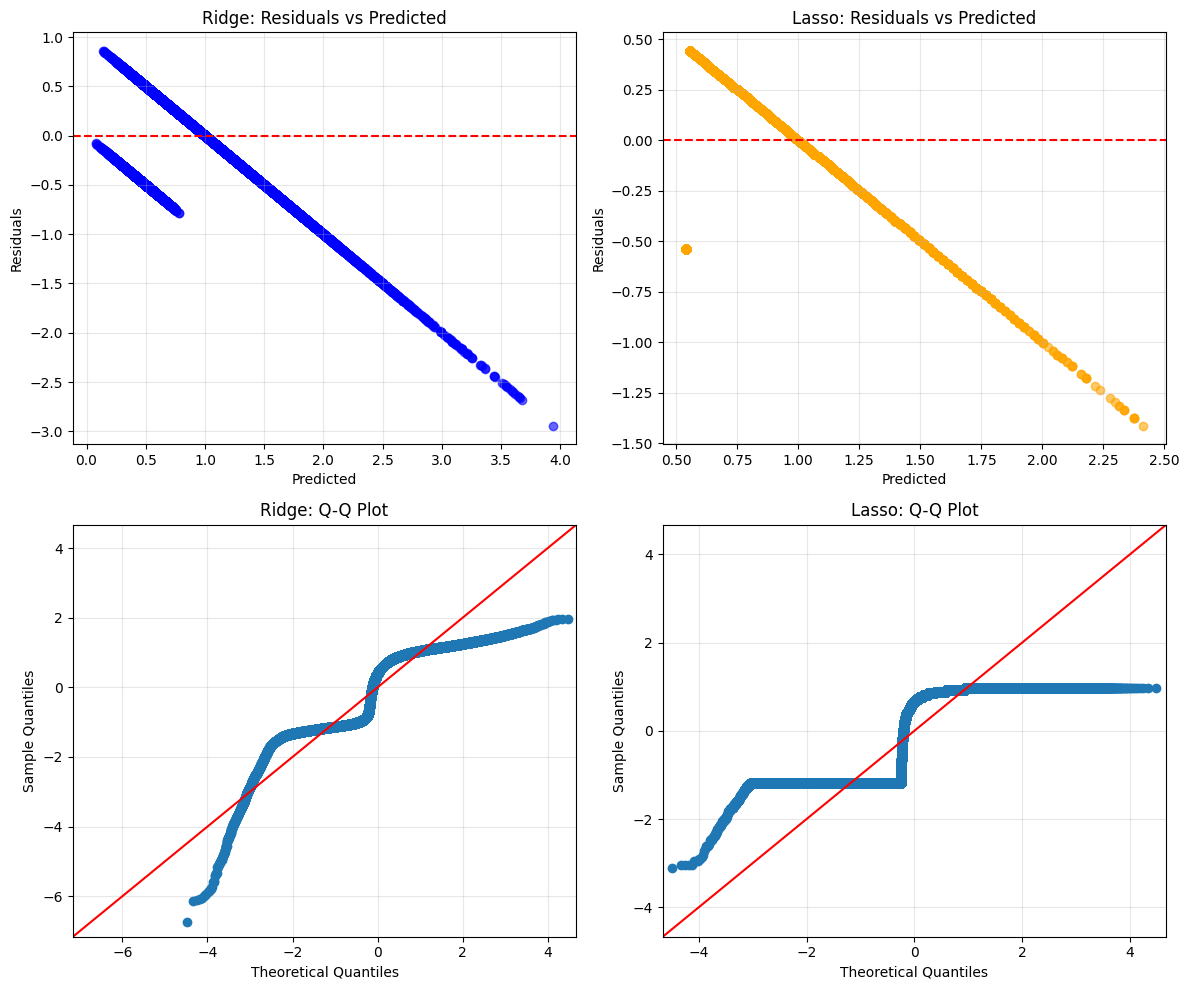

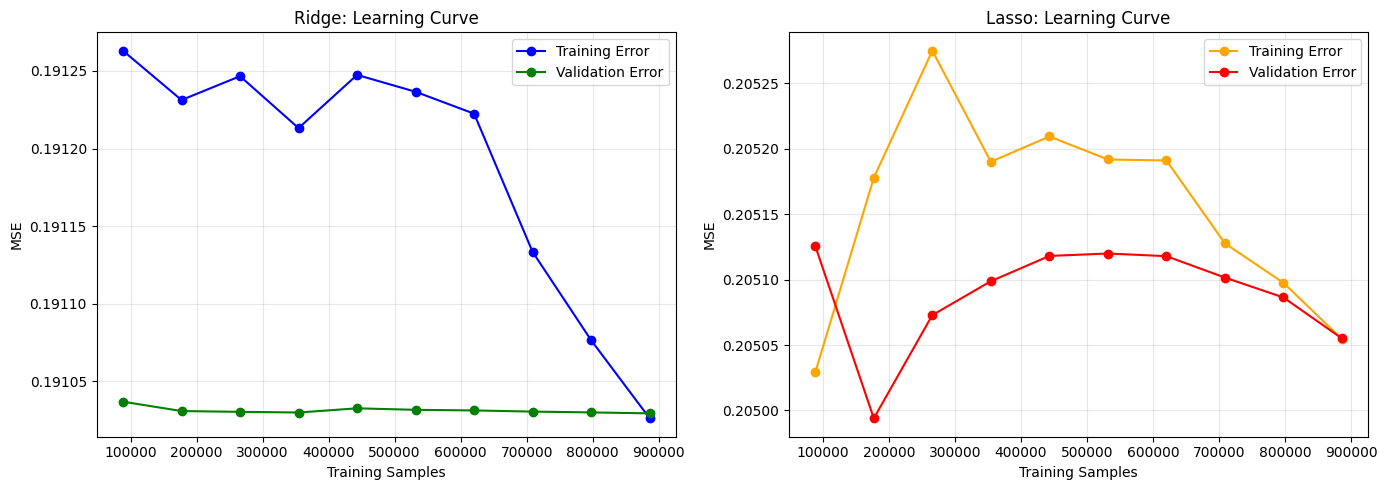

Ridge - Bias (MSE): 0.1910, Variance: 0.000000
Lasso - Bias (MSE): 0.2051, Variance: 0.000000


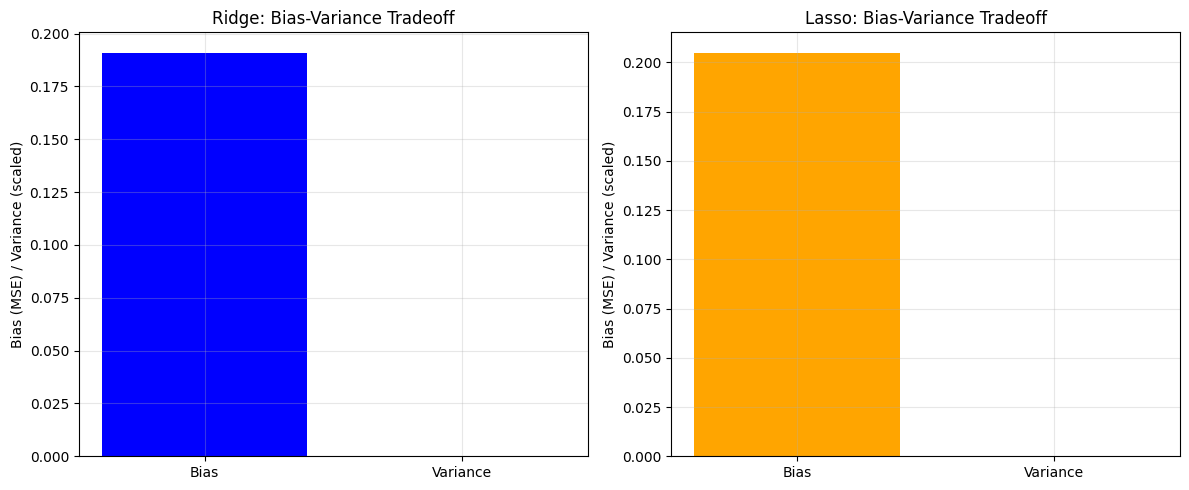

                       feature  ridge_coef  lasso_coef
0            add_to_cart_order   -0.042668   -0.000000
1               u_total_orders    0.015563    0.000000
2           u_avg_days_between   -0.002304   -0.000000
3            p_total_purchases    0.024951    0.000000
4  user_product_purchase_count    0.188781    0.112661
5        u_recent_reorder_rate    0.015174    0.000000
6               aisle_freq_enc    0.022185    0.000000


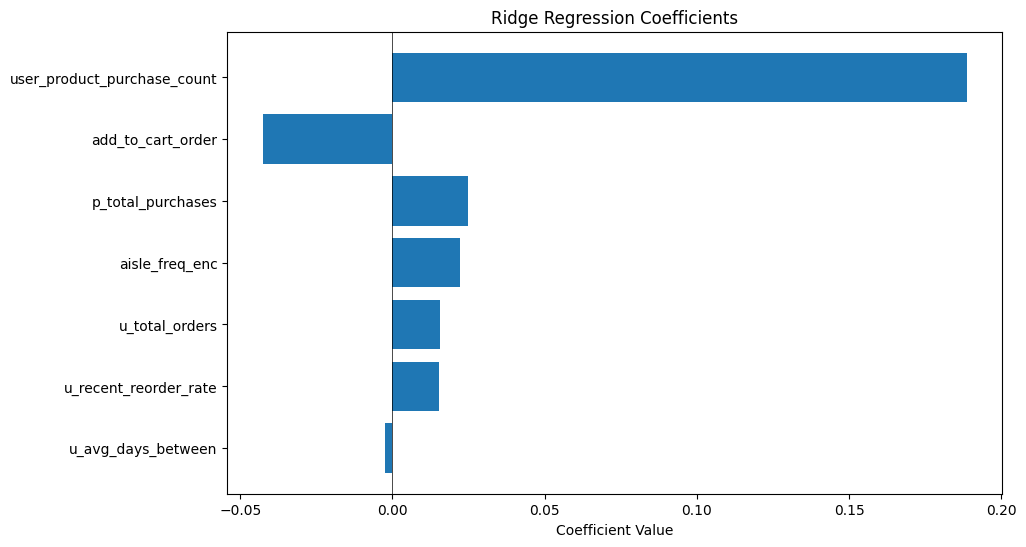

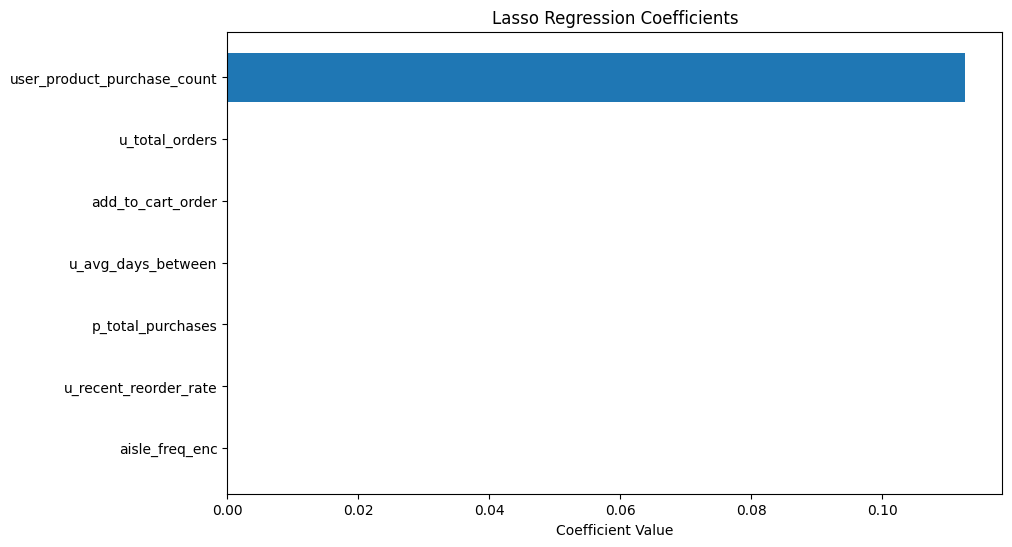

1. Gaussian Noise Test:
Noise Level     Ridge RMSE      Lasso RMSE     
    1% of std         0.437            0.453
    5% of std         0.437            0.453
   10% of std         0.438            0.453
2. Outlier Sensitivity Test:
  Ridge RMSE with outliers: 0.476
  Lasso RMSE with outliers: 0.463
3. Reduced Training Data Test:
Train      Ridge RMSE      Lasso RMSE     
    10%          0.437            0.453
    30%          0.437            0.453
    50%          0.437            0.453


In [62]:
# Linear Regression models (Ridge) and (Lasso)
from sklearn.linear_model import Ridge, Lasso 

# Evaluation metrics:
# Q-Q plots
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
# Heteroscedasticity test (Breusch-Pagan)
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
# Basic metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Ridge
# Define parameter 
param_for_ridge = {'alpha': [0.1, 1.0, 10.0]}

# Grid search with cross-validation
ridge_cv = GridSearchCV(Ridge(), param_for_ridge, cv=3, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_std, y_train)

# Best model
ridge_best = ridge_cv.best_estimator_
ridge_pred = ridge_best.predict(X_test_std)

# Lasso
# Define parameter 
param_for_lasso = {'alpha': [0.1, 1.0, 10.0]}

# Grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_for_lasso, cv=3, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_std, y_train)

# Best model
lasso_best = lasso_cv.best_estimator_
lasso_pred = lasso_best.predict(X_test_std)

# Evaluate & Compare Models
models = {
    'Ridge': ridge_pred,
    'Lasso': lasso_pred
}

for name, pred in models.items():
    print(f"\n{name}:")
    print(f"  MAE: {mean_absolute_error(y_test, pred):.3f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.3f}")
    print(f"  R²: {r2_score(y_test, pred):.3f}")


# Adjusted R²
n = len(y_test)
p = X_test_std.shape[1]  # number of features
r2 = r2_score(y_test, ridge_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R²: {adj_r2:.2f}")

# RESIDUAL PLOTS:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Ridge Residuals vs Predicted
axes[0, 0].scatter(ridge_pred, y_test - ridge_pred, alpha=0.6, color='blue')
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Ridge: Residuals vs Predicted')
axes[0, 0].grid(True, alpha=0.3)

# Lasso Residuals vs Predicted
axes[0, 1].scatter(lasso_pred, y_test - lasso_pred, alpha=0.6, color='orange')
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Lasso: Residuals vs Predicted')
axes[0, 1].grid(True, alpha=0.3)

# Ridge Q-Q Plot
sm.qqplot(y_test - ridge_pred, line='45', ax=axes[1, 0], fit=True)
axes[1, 0].set_title('Ridge: Q-Q Plot')
axes[1, 0].grid(True, alpha=0.3)

# Lasso Q-Q Plot
sm.qqplot(y_test - lasso_pred, line='45', ax=axes[1, 1], fit=True)
axes[1, 1].set_title('Lasso: Q-Q Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# BRUESCH-PAGAN TESTS:
# Test setup 
X_test_with_const = sm.add_constant(X_test_std)

# Ridge test
ridge_resid = y_test - ridge_pred
ridge_lm = sm.OLS(ridge_resid, X_test_with_const).fit()
ridge_bp = het_breuschpagan(ridge_lm.resid, X_test_with_const)

# Lasso test  
lasso_resid = y_test - lasso_pred
lasso_lm = sm.OLS(lasso_resid, X_test_with_const).fit()
lasso_bp = het_breuschpagan(lasso_lm.resid, X_test_with_const)


# Model comparison:
from sklearn.model_selection import learning_curve, cross_val_score

# LEARNING CURVES
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ridge learning curve
train_sizes_r, train_scores_r, val_scores_r = learning_curve(
    ridge_best, X_train_std, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

axes[0].plot(train_sizes_r, -np.mean(train_scores_r, axis=1), 'o-', color='blue', label='Training Error')
axes[0].plot(train_sizes_r, -np.mean(val_scores_r, axis=1), 'o-', color='green', label='Validation Error')
axes[0].set_xlabel('Training Samples')
axes[0].set_ylabel('MSE')
axes[0].set_title('Ridge: Learning Curve')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Lasso learning curve  
train_sizes_l, train_scores_l, val_scores_l = learning_curve(
    lasso_best, X_train_std, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

axes[1].plot(train_sizes_l, -np.mean(train_scores_l, axis=1), 'o-', color='orange', label='Training Error')
axes[1].plot(train_sizes_l, -np.mean(val_scores_l, axis=1), 'o-', color='red', label='Validation Error')
axes[1].set_xlabel('Training Samples')
axes[1].set_ylabel('MSE')
axes[1].set_title('Lasso: Learning Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Calculate bias and variance from CV
ridge_cv_scores = cross_val_score(ridge_best, X_train_std, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_cv_scores = cross_val_score(lasso_best, X_train_std, y_train, cv=5, scoring='neg_mean_squared_error')

ridge_bias = -np.mean(ridge_cv_scores)
ridge_variance = np.var(ridge_cv_scores)

lasso_bias = -np.mean(lasso_cv_scores)
lasso_variance = np.var(lasso_cv_scores)

print(f"Ridge - Bias (MSE): {ridge_bias:.4f}, Variance: {ridge_variance:.6f}")
print(f"Lasso - Bias (MSE): {lasso_bias:.4f}, Variance: {lasso_variance:.6f}")

# Bias-Variance bar plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ridge
axes[0].bar(['Bias', 'Variance'], [ridge_bias, ridge_variance*1000], color=['blue', 'lightblue'])
axes[0].set_title('Ridge: Bias-Variance Tradeoff')
axes[0].set_ylabel('Bias (MSE) / Variance (scaled)')
axes[0].grid(True, alpha=0.3)

# Lasso
axes[1].bar(['Bias', 'Variance'], [lasso_bias, lasso_variance*1000], color=['orange', 'peachpuff'])
axes[1].set_title('Lasso: Bias-Variance Tradeoff')
axes[1].set_ylabel('Bias (MSE) / Variance (scaled)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Explainability & Coefficients
# Sort by absolute value for better visualization
feature_names = X_train.columns.tolist()

# Create coefficients DataFrame
coefficients = pd.DataFrame({
    'feature': feature_names,
    'ridge_coef': ridge_best.coef_,
    'lasso_coef': lasso_best.coef_
})

print(coefficients)
coefficients['ridge_abs'] = np.abs(coefficients['ridge_coef'])
coefficients['lasso_abs'] = np.abs(coefficients['lasso_coef'])

# Plot Ridge coefficients
plt.figure(figsize=(10, 6))
ridge_sorted = coefficients.sort_values('ridge_abs', ascending=False)
plt.barh(ridge_sorted['feature'], ridge_sorted['ridge_coef'])
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.gca().invert_yaxis()
plt.show()

# Plot Lasso coefficients
plt.figure(figsize=(10, 6))
lasso_sorted = coefficients.sort_values('lasso_abs', ascending=False)
plt.barh(lasso_sorted['feature'], lasso_sorted['lasso_coef'])
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.gca().invert_yaxis()
plt.show()


# Gaussian Noise Test
print("1. Gaussian Noise Test:")
noise_levels = [0.01, 0.05, 0.1]  

print(f"{'Noise Level':<15} {'Ridge RMSE':<15} {'Lasso RMSE':<15}")

for level in noise_levels:
    # Add noise to test features
    noise = np.random.normal(0, level * np.std(X_test_std), X_test_std.shape)
    X_noisy = X_test_std + noise
    
    # Predict with both models
    ridge_pred_noisy = ridge_best.predict(X_noisy)
    lasso_pred_noisy = lasso_best.predict(X_noisy)
    
    # Calculate RMSE
    ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_noisy))
    lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred_noisy))
    
    print(f"{level*100:>5.0f}% of std    {ridge_rmse:>10.3f}       {lasso_rmse:>10.3f}")

# Outlier Sensitivity Test
print("2. Outlier Sensitivity Test:")

X_outlier = X_test_std.copy()
# Randomly select 1% of values to become outliers
np.random.seed(42)  # For reproducibility
outlier_mask = np.random.random(X_outlier.shape) < 0.01
X_outlier[outlier_mask] *= 10 

# Predict with outliers
ridge_pred_outlier = ridge_best.predict(X_outlier)
lasso_pred_outlier = lasso_best.predict(X_outlier)

# Calculate RMSE
ridge_outlier_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_outlier))
lasso_outlier_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred_outlier))

print(f"  Ridge RMSE with outliers: {ridge_outlier_rmse:.3f}")
print(f"  Lasso RMSE with outliers: {lasso_outlier_rmse:.3f}")

# Reduced Training Data Test
print("3. Reduced Training Data Test:")
training_sizes = [0.1, 0.3, 0.5]  

print(f"{'Train':<10} {'Ridge RMSE':<15} {'Lasso RMSE':<15}")

for size in training_sizes:
    n_samples = int(size * len(X_train_std))
    X_subset = X_train_std[:n_samples]
    y_subset = y_train[:n_samples]
    
    # Train new models with same hyperparameters
    ridge_temp = Ridge(alpha=ridge_best.alpha)
    lasso_temp = Lasso(alpha=lasso_best.alpha, max_iter=10000)
    
    ridge_temp.fit(X_subset, y_subset)
    lasso_temp.fit(X_subset, y_subset)
    
    # Predict on test set
    ridge_pred_temp = ridge_temp.predict(X_test_std)
    lasso_pred_temp = lasso_temp.predict(X_test_std)
    
    # Calculate RMSE
    ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred_temp))
    lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred_temp))
    
    print(f"{size*100:>6.0f}%     {ridge_rmse:>10.3f}       {lasso_rmse:>10.3f}")